Hello World !

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import cv2
import glob
import numpy as np
from random import randint
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

#from os.path import dirname, realpath, sep, pardir
#import sys, os
#print(os.path)
#print(sys.path)
#sys.path.append('/Users/Mikkawi/anaconda/pkgs/opencv-3.2.0-np112py36_blas_openblas_201')
#sys.path.append('/Users/Mikkawi/anaconda/pkgs')

#print ("Hello World!")

#import cv2

#img = mpimg.imread('camera_cal/calibration1.jpg')
#plt.imshow(img)

images = glob.glob('camera_cal/calibration*.jpg')

In [5]:
objpoints = []
imgpoints = []

objp = np.zeros((6*9,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
#print(objp)

for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    print(idx," :",fname)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        #cv2.drawChessboardCorners(img,(9,6),corners,ret)
        write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        print(write_name)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)
        #cv2.destroyAllWindows()


0  : camera_cal/calibration1.jpg
1  : camera_cal/calibration10.jpg
corners_found1.jpg
2  : camera_cal/calibration11.jpg
corners_found2.jpg
3  : camera_cal/calibration12.jpg
corners_found3.jpg
4  : camera_cal/calibration13.jpg
corners_found4.jpg
5  : camera_cal/calibration14.jpg
corners_found5.jpg
6  : camera_cal/calibration15.jpg
corners_found6.jpg
7  : camera_cal/calibration16.jpg
corners_found7.jpg
8  : camera_cal/calibration17.jpg
corners_found8.jpg
9  : camera_cal/calibration18.jpg
corners_found9.jpg
10  : camera_cal/calibration19.jpg
corners_found10.jpg
11  : camera_cal/calibration2.jpg
corners_found11.jpg
12  : camera_cal/calibration20.jpg
corners_found12.jpg
13  : camera_cal/calibration3.jpg
corners_found13.jpg
14  : camera_cal/calibration4.jpg
15  : camera_cal/calibration5.jpg
16  : camera_cal/calibration6.jpg
corners_found16.jpg
17  : camera_cal/calibration7.jpg
corners_found17.jpg
18  : camera_cal/calibration8.jpg
corners_found18.jpg
19  : camera_cal/calibration9.jpg
corners_

In [6]:
#from random import randint

x = randint(1,20)
filname= 'camera_cal/calibration'+str(x)+'.jpg'
img = mpimg.imread(filname)
img_size = (img.shape[1], img.shape[0])


# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)

#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
#ax1.imshow(img)
#ax1.set_title('Original Image', fontsize=30)
#ax2.imshow(dst)
#ax2.set_title('Undistorted Image', fontsize=30)

In [7]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    if img.ndim ==2:
        gray = img

    else: 
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        #print('Colored photo')
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)

    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    grad_binary = sbinary
    return grad_binary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    if img.ndim ==2:
        gray = img
    else: 
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    gradmag = np.sqrt(sobelx**2+sobely**2)
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
  
    #print(img.shape, len(img),img.ndim)
    if img.ndim ==2:
        gray = img
    else: 
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
    sobelx = cv2.Sobel(gray, cv2.CV_64F,1,0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F,0,1, ksize = sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    grad_direction = np.arctan2(abs_sobely,abs_sobelx)
    dir_binary = np.zeros_like(grad_direction)
    dir_binary[(grad_direction > thresh[0] )& (grad_direction < thresh[1])] = 1

    return dir_binary

def clr_threshold(img, thresh=(0,255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]

    #thresh = (170, 255)
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    
    return S, binary
    

In [8]:
# 1- Removing distortion from image.
testimage = mpimg.imread('test_images/straight_lines1.jpg')
#testimage = mpimg.imread('test_images/straight_lines2.jpg')
#testimage = mpimg.imread('test_images/test1.jpg')
#testimage = mpimg.imread('test_images/test2.jpg')


testimage_u = cv2.undistort(testimage, mtx, dist, None, mtx)


#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
#ax1.imshow(testimage)
#ax1.set_title('Original Image', fontsize=30)
#ax2.imshow(testimage_u)
#ax2.set_title('Undistorted Image', fontsize=30)

In [10]:

testimage = testimage_u



img_sobelx    = abs_sobel_thresh(testimage,'x',9,(20,100))
img_sobely    = abs_sobel_thresh(testimage,'y',9,(40,100))
img_mag       = mag_thresh(testimage,9,(40,100))
img_dir       = dir_threshold(testimage,9,(0.7,1.3))
S, img_clr    = clr_threshold(testimage,(150,255))

img_comp = np.zeros_like(img_sobelx)
img_comp[((img_sobelx == 1) & (img_sobely == 1)) | ((img_mag == 1) & (img_dir == 1))|(img_clr ==1)] = 1
'''
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(testimage, cmap='gray')
ax1.set_title('Original', fontsize=50)
ax2.imshow(img_sobelx, cmap='gray')
ax2.set_title('Sobel X', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

ff, (ax3, ax4) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax3.imshow(img_sobely, cmap='gray')
ax3.set_title('Sobel y', fontsize=50)
ax4.imshow(img_mag, cmap='gray')
ax4.set_title('magnitude threshold', fontsize=50)

#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

f, (ax5, ax6) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax5.imshow(S, cmap ='gray')
ax5.set_title('S-Channel', fontsize=50)
ax6.imshow(img_clr, cmap='gray')
ax6.set_title('S Binary', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


ff, (ax7,ax8) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax7.imshow(img_dir, cmap='gray')
ax7.set_title('Directional', fontsize=50)
ax8.imshow(img_comp, cmap='gray')
ax8.set_title('combined',fontsize = 50)
'''

"\nf, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(testimage, cmap='gray')\nax1.set_title('Original', fontsize=50)\nax2.imshow(img_sobelx, cmap='gray')\nax2.set_title('Sobel X', fontsize=50)\n\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n\nff, (ax3, ax4) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax3.imshow(img_sobely, cmap='gray')\nax3.set_title('Sobel y', fontsize=50)\nax4.imshow(img_mag, cmap='gray')\nax4.set_title('magnitude threshold', fontsize=50)\n\n#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n\nf, (ax5, ax6) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax5.imshow(S, cmap ='gray')\nax5.set_title('S-Channel', fontsize=50)\nax6.imshow(img_clr, cmap='gray')\nax6.set_title('S Binary', fontsize=50)\n\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n\n\nff, (ax7,ax8) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax7.imshow(img_dir, cmap='gray')\nax7.set_title('Directional', 

In [21]:
#Define a function to apply image mask

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [14]:
# Sobelx and S-Channel Binary images seem to have better lane lines detection
# will test both with different threshold, and combine their results
testimage = mpimg.imread('test_images/test1.jpg')
testimage = cv2.undistort(testimage, mtx, dist, None, mtx)
test1     = testimage

img_sobel1    = abs_sobel_thresh(testimage,'x',9,(20,100))
img_sobel2    = abs_sobel_thresh(testimage,'x',9,(30,100))
img_sobel3    = abs_sobel_thresh(testimage,'x',9,(40,100))
img_sobel4    = abs_sobel_thresh(testimage,'x',9,(50,100))

'''
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_sobel1, cmap='gray')
ax1.set_title('1', fontsize=50)
ax2.imshow(img_sobel2, cmap='gray')
ax2.set_title('2', fontsize=50)
ax3.imshow(img_sobel3, cmap='gray')
ax3.set_title('3', fontsize=50)
ax4.imshow(img_sobel4, cmap='gray')
ax4.set_title('4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

S, img_clr1   = clr_threshold(testimage,(150,255))
S, img_clr2   = clr_threshold(testimage,(170,255))
S, img_clr3   = clr_threshold(testimage,(190,255))
S, img_clr4   = clr_threshold(testimage,(210,255))
'''
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_clr1, cmap='gray')
ax1.set_title('1', fontsize=50)
ax2.imshow(img_clr2, cmap='gray')
ax2.set_title('2', fontsize=50)
ax3.imshow(img_clr3, cmap='gray')
ax3.set_title('3', fontsize=50)
ax4.imshow(img_clr4, cmap='gray')
ax4.set_title('4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

'''
    
img_sobelx    = abs_sobel_thresh(testimage,'x',9,(30,100))
img_sobely    = abs_sobel_thresh(testimage,'y',9,(40,100))
img_mag       = mag_thresh(testimage,9,(40,100))
img_dir       = dir_threshold(testimage,9,(0.7,1.3))
S, img_clr    = clr_threshold(testimage,(150,255))

img_comb      = np.zeros_like(img_sobelx)
img_comb2     = np.zeros_like(img_sobelx)

img_comb[((img_sobelx == 1) & (img_sobely == 1)) | ((img_mag == 1) & (img_dir == 1))|(img_clr ==1)] = 1
img_comb2[((img_sobel4 == 1)  | (img_clr1 == 1))]                                                    = 1
'''
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_comb, cmap='gray')
ax1.set_title('Combo : (X AND Y) OR (MAG AND Dire) OR CLR', fontsize=25)
ax2.imshow(img_comb2, cmap='gray')
ax2.set_title('Combo2: X or Clr', fontsize=25)
'''
img_test1 = img_comb2 #selected threshold combo


In [15]:
# Sobelx and S-Channel Binary images seem to have better lane lines detection
# will test both with different threshold, and combine their results
testimage = mpimg.imread('test_images/test2.jpg')
testimage = cv2.undistort(testimage, mtx, dist, None, mtx)
test2     = testimage

img_sobel1    = abs_sobel_thresh(testimage,'x',9,(30,100))
img_sobel2    = abs_sobel_thresh(testimage,'x',9,(30,100))
img_sobel3    = abs_sobel_thresh(testimage,'x',9,(40,100))
img_sobel4    = abs_sobel_thresh(testimage,'x',9,(50,100))
'''
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_sobel1, cmap='gray')
ax1.set_title('1', fontsize=50)
ax2.imshow(img_sobel2, cmap='gray')
ax2.set_title('2', fontsize=50)
ax3.imshow(img_sobel3, cmap='gray')
ax3.set_title('3', fontsize=50)
ax4.imshow(img_sobel4, cmap='gray')
ax4.set_title('4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

'''
S, img_clr1   = clr_threshold(testimage,(150,255))
S, img_clr2   = clr_threshold(testimage,(170,255))
S, img_clr3   = clr_threshold(testimage,(190,255))
S, img_clr4   = clr_threshold(testimage,(210,255))
'''
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_clr1, cmap='gray')
ax1.set_title('1', fontsize=50)
ax2.imshow(img_clr2, cmap='gray')
ax2.set_title('2', fontsize=50)
ax3.imshow(img_clr3, cmap='gray')
ax3.set_title('3', fontsize=50)
ax4.imshow(img_clr4, cmap='gray')
ax4.set_title('4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''
img_sobelx    = abs_sobel_thresh(testimage,'x',9,(30,100))
img_sobely    = abs_sobel_thresh(testimage,'y',9,(40,100))
img_mag       = mag_thresh(testimage,9,(40,100))
img_dir       = dir_threshold(testimage,9,(0.7,1.3))
S, img_clr    = clr_threshold(testimage,(150,255))

img_comb      = np.zeros_like(img_sobelx)
img_comb2     = np.zeros_like(img_sobelx)

img_comb[((img_sobelx == 1) & (img_sobely == 1)) | ((img_mag == 1) & (img_dir == 1))|(img_clr ==1)] = 1
img_comb2[((img_sobel4 == 1)  | (img_clr1 == 1))]                                                    = 1
'''
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_comb, cmap='gray')
ax1.set_title('Combo : (X AND Y) OR (MAG AND Dire) OR CLR', fontsize=25)
ax2.imshow(img_comb2, cmap='gray')
ax2.set_title('Combo2: X or Clr', fontsize=25)
'''
img_test2 = img_comb2 #selected threshold combo

In [16]:
# Sobelx and S-Channel Binary images seem to have better lane lines detection
# will test both with different threshold, and combine their results
testimage = mpimg.imread('test_images/test3.jpg')
testimage = cv2.undistort(testimage, mtx, dist, None, mtx)
test3     = testimage
img_sobel1    = abs_sobel_thresh(testimage,'x',9,(20,100))
img_sobel2    = abs_sobel_thresh(testimage,'x',9,(30,100))
img_sobel3    = abs_sobel_thresh(testimage,'x',9,(40,100))
img_sobel4    = abs_sobel_thresh(testimage,'x',9,(50,100))

'''
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_sobel1, cmap='gray')
ax1.set_title('1', fontsize=50)
ax2.imshow(img_sobel2, cmap='gray')
ax2.set_title('2', fontsize=50)
ax3.imshow(img_sobel3, cmap='gray')
ax3.set_title('3', fontsize=50)
ax4.imshow(img_sobel4, cmap='gray')
ax4.set_title('4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

'''
S, img_clr1   = clr_threshold(testimage,(150,255))
S, img_clr2   = clr_threshold(testimage,(170,255))
S, img_clr3   = clr_threshold(testimage,(190,255))
S, img_clr4   = clr_threshold(testimage,(210,255))
'''
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_clr1, cmap='gray')
ax1.set_title('1', fontsize=50)
ax2.imshow(img_clr2, cmap='gray')
ax2.set_title('2', fontsize=50)
ax3.imshow(img_clr3, cmap='gray')
ax3.set_title('3', fontsize=50)
ax4.imshow(img_clr4, cmap='gray')
ax4.set_title('4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''
img_sobelx    = abs_sobel_thresh(testimage,'x',9,(30,100))
img_sobely    = abs_sobel_thresh(testimage,'y',9,(40,100))
img_mag       = mag_thresh(testimage,9,(40,100))
img_dir       = dir_threshold(testimage,9,(0.7,1.3))
S, img_clr    = clr_threshold(testimage,(150,255))

img_comb      = np.zeros_like(img_sobelx)
img_comb2     = np.zeros_like(img_sobelx)

img_comb[((img_sobelx == 1) & (img_sobely == 1)) | ((img_mag == 1) & (img_dir == 1))|(img_clr ==1)] = 1
img_comb2[((img_sobel4 == 1)  | (img_clr1 == 1))]                                                     = 1

'''
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_comb, cmap='gray')
ax1.set_title('Combo : (X AND Y) OR (MAG AND Dire) OR CLR', fontsize=25)
ax2.imshow(img_comb2, cmap='gray')
ax2.set_title('Combo2: X or Clr', fontsize=25)
'''
img_test3 = img_comb2 #selected threshold combo

In [17]:
# Sobelx and S-Channel Binary images seem to have better lane lines detection
# will test both with different threshold, and combine their results
testimage = mpimg.imread('test_images/test4.jpg')
testimage = cv2.undistort(testimage, mtx, dist, None, mtx)
test4     = testimage
img_sobel1    = abs_sobel_thresh(testimage,'x',9,(20,100))
img_sobel2    = abs_sobel_thresh(testimage,'x',9,(30,100))
img_sobel3    = abs_sobel_thresh(testimage,'x',9,(40,100))
img_sobel4    = abs_sobel_thresh(testimage,'x',9,(50,100))
'''
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_sobel1, cmap='gray')
ax1.set_title('1', fontsize=50)
ax2.imshow(img_sobel2, cmap='gray')
ax2.set_title('2', fontsize=50)
ax3.imshow(img_sobel3, cmap='gray')
ax3.set_title('3', fontsize=50)
ax4.imshow(img_sobel4, cmap='gray')
ax4.set_title('4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

'''
S, img_clr1   = clr_threshold(testimage,(150,255))
S, img_clr2   = clr_threshold(testimage,(170,255))
S, img_clr3   = clr_threshold(testimage,(190,255))
S, img_clr4   = clr_threshold(testimage,(210,255))
'''
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_clr1, cmap='gray')
ax1.set_title('1', fontsize=50)
ax2.imshow(img_clr2, cmap='gray')
ax2.set_title('2', fontsize=50)
ax3.imshow(img_clr3, cmap='gray')
ax3.set_title('3', fontsize=50)
ax4.imshow(img_clr4, cmap='gray')
ax4.set_title('4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''
img_sobelx    = abs_sobel_thresh(testimage,'x',9,(30,100))
img_sobely    = abs_sobel_thresh(testimage,'y',9,(40,100))
img_mag       = mag_thresh(testimage,9,(40,100))
img_dir       = dir_threshold(testimage,9,(0.7,1.3))
S, img_clr    = clr_threshold(testimage,(150,255))

img_comb      = np.zeros_like(img_sobelx)
img_comb2     = np.zeros_like(img_sobelx)

img_comb[((img_sobelx == 1) & (img_sobely == 1)) | ((img_mag == 1) & (img_dir == 1))|(img_clr ==1)] = 1
img_comb2[((img_sobel4 == 1)  | (img_clr1 == 1))]                                                    = 1
'''
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_comb, cmap='gray')
ax1.set_title('Combo : (X AND Y) OR (MAG AND Dire) OR CLR', fontsize=25)
ax2.imshow(img_comb2, cmap='gray')
ax2.set_title('Combo2: X or Clr', fontsize=25)
'''
img_test4 = img_comb2 #selected threshold combo

In [18]:
# Sobelx and S-Channel Binary images seem to have better lane lines detection
# will test both with different threshold, and combine their results
testimage = mpimg.imread('test_images/test5.jpg')
testimage = cv2.undistort(testimage, mtx, dist, None, mtx)
test5     = testimage
img_sobel1    = abs_sobel_thresh(testimage,'x',9,(20,100))
img_sobel2    = abs_sobel_thresh(testimage,'x',9,(30,100))
img_sobel3    = abs_sobel_thresh(testimage,'x',9,(40,100))
img_sobel4    = abs_sobel_thresh(testimage,'x',9,(50,100))
'''
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_sobel1, cmap='gray')
ax1.set_title('1', fontsize=50)
ax2.imshow(img_sobel2, cmap='gray')
ax2.set_title('2', fontsize=50)
ax3.imshow(img_sobel3, cmap='gray')
ax3.set_title('3', fontsize=50)
ax4.imshow(img_sobel4, cmap='gray')
ax4.set_title('4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

S, img_clr1   = clr_threshold(testimage,(150,255))
S, img_clr2   = clr_threshold(testimage,(170,255))
S, img_clr3   = clr_threshold(testimage,(190,255))
S, img_clr4   = clr_threshold(testimage,(210,255))
'''
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_clr1, cmap='gray')
ax1.set_title('1', fontsize=50)
ax2.imshow(img_clr2, cmap='gray')
ax2.set_title('2', fontsize=50)
ax3.imshow(img_clr3, cmap='gray')
ax3.set_title('3', fontsize=50)
ax4.imshow(img_clr4, cmap='gray')
ax4.set_title('4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''
img_sobelx    = abs_sobel_thresh(testimage,'x',9,(30,100))
img_sobely    = abs_sobel_thresh(testimage,'y',9,(40,100))
img_mag       = mag_thresh(testimage,9,(40,100))
img_dir       = dir_threshold(testimage,9,(0.7,1.3))
S, img_clr    = clr_threshold(testimage,(150,255))

img_comb      = np.zeros_like(img_sobelx)
img_comb2     = np.zeros_like(img_sobelx)

img_comb[((img_sobelx == 1) & (img_sobely == 1)) | ((img_mag == 1) & (img_dir == 1))|(img_clr ==1)] = 1
img_comb2[((img_sobel4 == 1)  | (img_clr1 == 1))]                                                  = 1
'''
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_comb, cmap='gray')
ax1.set_title('Combo : (X AND Y) OR (MAG AND Dire) OR CLR', fontsize=25)
ax2.imshow(img_comb2, cmap='gray')
ax2.set_title('Combo2: X or Clr', fontsize=25)
'''
img_test5 = img_comb2 #selected threshold combo

In [19]:
# Sobelx and S-Channel Binary images seem to have better lane lines detection
# will test both with different threshold, and combine their results
testimage = mpimg.imread('test_images/test6.jpg')
testimage = cv2.undistort(testimage, mtx, dist, None, mtx)
test6     = testimage
img_sobel1    = abs_sobel_thresh(testimage,'x',9,(20,100))
img_sobel2    = abs_sobel_thresh(testimage,'x',9,(30,100))
img_sobel3    = abs_sobel_thresh(testimage,'x',9,(40,100))
img_sobel4    = abs_sobel_thresh(testimage,'x',9,(50,100))
'''
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_sobel1, cmap='gray')
ax1.set_title('1', fontsize=50)
ax2.imshow(img_sobel2, cmap='gray')
ax2.set_title('2', fontsize=50)
ax3.imshow(img_sobel3, cmap='gray')
ax3.set_title('3', fontsize=50)
ax4.imshow(img_sobel4, cmap='gray')
ax4.set_title('4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

S, img_clr1   = clr_threshold(testimage,(150,255))
S, img_clr2   = clr_threshold(testimage,(170,255))
S, img_clr3   = clr_threshold(testimage,(190,255))
S, img_clr4   = clr_threshold(testimage,(210,255))
'''
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_clr1, cmap='gray')
ax1.set_title('1', fontsize=50)
ax2.imshow(img_clr2, cmap='gray')
ax2.set_title('2', fontsize=50)
ax3.imshow(img_clr3, cmap='gray')
ax3.set_title('3', fontsize=50)
ax4.imshow(img_clr4, cmap='gray')
ax4.set_title('4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''
img_sobelx    = abs_sobel_thresh(testimage,'x',9,(30,100))
img_sobely    = abs_sobel_thresh(testimage,'y',9,(40,100))
img_mag       = mag_thresh(testimage,9,(40,100))
img_dir       = dir_threshold(testimage,9,(0.7,1.3))
S, img_clr    = clr_threshold(testimage,(150,255))

img_comb      = np.zeros_like(img_sobelx)
img_comb2     = np.zeros_like(img_sobelx)

img_comb[((img_sobelx == 1) & (img_sobely == 1)) | ((img_mag == 1) & (img_dir == 1))|(img_clr ==1)] = 1
img_comb2[((img_sobel4 == 1)  | (img_clr1 == 1))]                                                    = 1
'''
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_comb, cmap='gray')
ax1.set_title('Combo : (X AND Y) OR (MAG AND Dire) OR CLR', fontsize=25)
ax2.imshow(img_comb2, cmap='gray')
ax2.set_title('Combo2: X or Clr', fontsize=25)
'''
img_test6 = img_comb2 #selected threshold combo

In [22]:
def warp(img):
    img_size = (img.shape[1],img.shape[0])
    src = np.float32(
    [[718,470],
    [1065,690],
    [240,690],
    [565,470]])
    dst = np.float32(  # kept playing with these numbers to get an optimum result, better lines
    [[800,0],
     [800,700],
     [400,700],
     [400,0]])
    M = cv2.getPerspectiveTransform(src,dst)
    warped = cv2.warpPerspective(img,M,img_size,flags = cv2.INTER_LINEAR)
    
    return warped

def warp2(img):  #old values, I changed the main function to test other settings
    img_size = (img.shape[1],img.shape[0])
    src = np.float32(
    [[670,440],
    [1065,690],
    [240,690],
    [610,440]])
    dst = np.float32(  # kept playing with these numbers to get an optimum result, better lines
    [[800,0],
     [800,700],
     [400,700],
     [400,0]])
    M = cv2.getPerspectiveTransform(src,dst)
    warped = cv2.warpPerspective(img,M,img_size,flags = cv2.INTER_LINEAR)
    
    return warped

"\nf, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(m_testimg1, cmap='gray')\nax1.set_title('Masked image 1', fontsize=25)\nax1.plot(w_points[0,0],w_points[0,1],'.')\nax1.plot(w_points[1,0],w_points[1,1],'.')\nax1.plot(w_points[2,0],w_points[2,1],'.')\nax1.plot(w_points[3,0],w_points[3,1],'.')\n\nax2.imshow(m_testimg2, cmap='gray')\nax2.set_title('Masked image 2', fontsize=25)\nax2.plot(w_points[0,0],w_points[0,1],'.')\nax2.plot(w_points[1,0],w_points[1,1],'.')\nax2.plot(w_points[2,0],w_points[2,1],'.')\nax2.plot(w_points[3,0],w_points[3,1],'.')\n\nprint(vertices)\n"

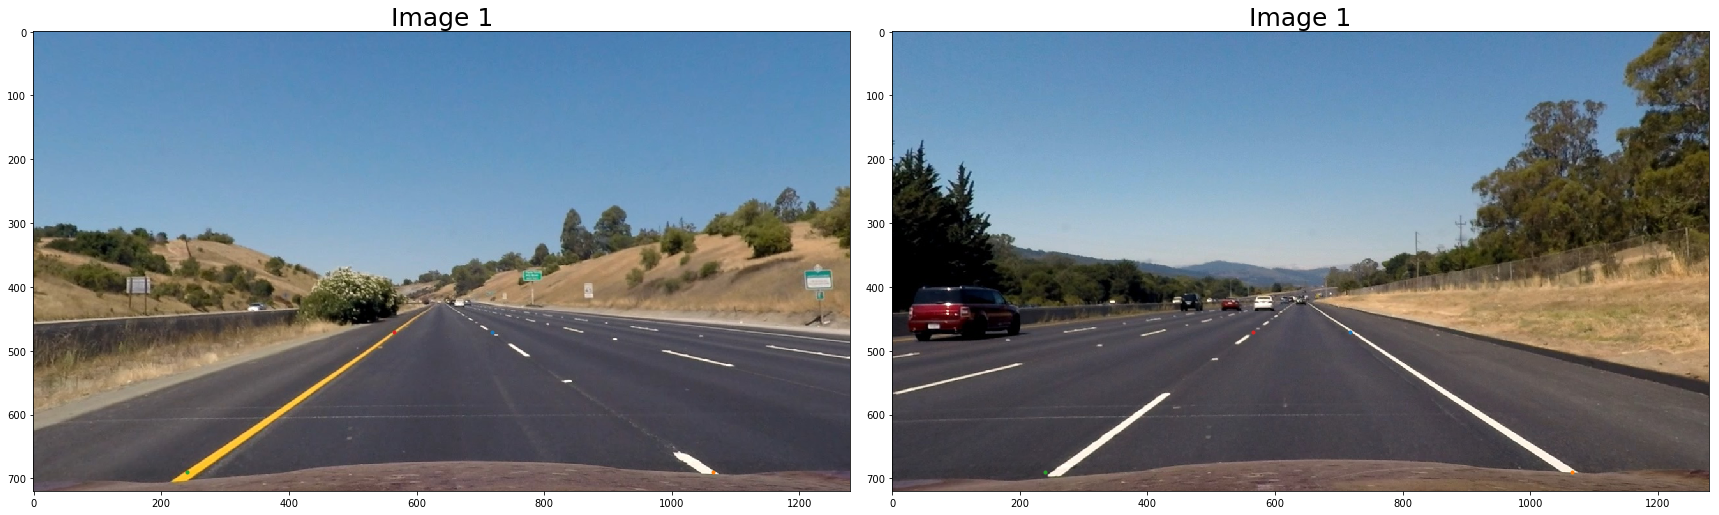

In [23]:
#Adjust polygen vertices to perform warping and masking

testimage  = mpimg.imread('test_images/straight_lines1.jpg')
testimage2 = mpimg.imread('test_images/straight_lines2.jpg')
testimage  = cv2.undistort(testimage, mtx, dist, None, mtx)
testimage2 = cv2.undistort(testimage2, mtx, dist, None, mtx)

#selected points on image for warping, based on many iterations
w_points = np.matrix([[718, 470],[1065, 690],[240,690],[565,470]])

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(testimage, cmap='gray')
ax1.set_title('Image 1', fontsize=25)
ax1.plot(w_points[0,0],w_points[0,1],'.')
ax1.plot(w_points[1,0],w_points[1,1],'.')
ax1.plot(w_points[2,0],w_points[2,1],'.')
ax1.plot(w_points[3,0],w_points[3,1],'.')

ax2.imshow(testimage2, cmap='gray')
ax2.set_title('Image 1', fontsize=25)
ax2.plot(w_points[0,0],w_points[0,1],'.')
ax2.plot(w_points[1,0],w_points[1,1],'.')
ax2.plot(w_points[2,0],w_points[2,1],'.')
ax2.plot(w_points[3,0],w_points[3,1],'.')

#masking vertices slightly to the right and left of the warping points
vertices = np.array([[(w_points[0,0],w_points[0,1]),(w_points[1,0],w_points[1,1]),(w_points[2,0],w_points[2,1]),(w_points[3,0],w_points[3,1])]],dtype=np.int32)
margin = 50
vertices = np.array([[(w_points[0,0]+margin,w_points[0,1]),(w_points[1,0]+margin,w_points[1,1]),(w_points[2,0]-margin,w_points[2,1]),(w_points[3,0]-margin,w_points[3,1])]],dtype=np.int32)
m_testimg1 = region_of_interest(testimage, vertices)
m_testimg2 = region_of_interest(testimage2, vertices)
'''
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(m_testimg1, cmap='gray')
ax1.set_title('Masked image 1', fontsize=25)
ax1.plot(w_points[0,0],w_points[0,1],'.')
ax1.plot(w_points[1,0],w_points[1,1],'.')
ax1.plot(w_points[2,0],w_points[2,1],'.')
ax1.plot(w_points[3,0],w_points[3,1],'.')

ax2.imshow(m_testimg2, cmap='gray')
ax2.set_title('Masked image 2', fontsize=25)
ax2.plot(w_points[0,0],w_points[0,1],'.')
ax2.plot(w_points[1,0],w_points[1,1],'.')
ax2.plot(w_points[2,0],w_points[2,1],'.')
ax2.plot(w_points[3,0],w_points[3,1],'.')

print(vertices)
'''

In [24]:
# Prespective Transform Test on Straight lines

testimage  = mpimg.imread('test_images/straight_lines1.jpg')
testimage2 = mpimg.imread('test_images/straight_lines2.jpg')
testimage  = cv2.undistort(testimage, mtx, dist, None, mtx)
testimage2 = cv2.undistort(testimage2, mtx, dist, None, mtx)

#testimage  = region_of_interest(testimage, vertices)
#testimage2 = region_of_interest(testimage2, vertices)

img_sobelx    = abs_sobel_thresh(testimage,'x',9,(50,100))
img_sobely    = abs_sobel_thresh(testimage,'y',9,(50,100))
img_mag       = mag_thresh(testimage,9,(40,100))
img_dir       = dir_threshold(testimage,9,(0.7,1.3))
S, img_clr    = clr_threshold(testimage,(150,255))

img_sobelx2    = abs_sobel_thresh(testimage2,'x',9,(50,100))
img_sobely2   = abs_sobel_thresh(testimage2,'y',9,(50,100))
img_mag2       = mag_thresh(testimage2,9,(40,100))
img_dir2       = dir_threshold(testimage2,9,(0.7,1.3))
S, img_clr2    = clr_threshold(testimage2,(150,255))

img_1 = np.zeros_like(img_sobelx)
#img_1[((img_sobelx == 1) & (img_sobely == 1)) | ((img_mag == 1) & (img_dir == 1))|(img_clr ==1)] = 1
img_1[((img_sobelx == 1)  | (img_clr == 1))] =1
img_2 = np.zeros_like(img_sobelx)
#img_2[((img_sobelx2 == 1) & (img_sobely2 == 1)) | ((img_mag2 == 1) & (img_dir2 == 1))|(img_clr2 ==1)] = 1
img_2[((img_sobelx2 == 1)  | (img_clr2 == 1))] =1

img_1  = region_of_interest(img_1, vertices)
img_2  = region_of_interest(img_2, vertices)
'''
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_1, cmap='gray')
ax1.set_title('Image 1', fontsize=25)
ax1.plot(w_points[0,0],w_points[0,1],'.')
ax1.plot(w_points[1,0],w_points[1,1],'.')
ax1.plot(w_points[2,0],w_points[2,1],'.')
ax1.plot(w_points[3,0],w_points[3,1],'.')

ax2.imshow(img_2, cmap='gray')
ax2.set_title('Image 2', fontsize=25)

ax2.plot(w_points[0,0],w_points[0,1],'.')
ax2.plot(w_points[1,0],w_points[1,1],'.')
ax2.plot(w_points[2,0],w_points[2,1],'.')
ax2.plot(w_points[3,0],w_points[3,1],'.')
'''
w_img_1 = warp(img_1)
w_img_2 = warp(img_2)
w_testimage  = warp(testimage)
w_testimage2 = warp(testimage2)
'''
f, (ax5,ax6) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax5.imshow(testimage)
ax5.plot(w_points[0,0],w_points[0,1],'.')
ax5.plot(w_points[1,0],w_points[1,1],'.')
ax5.plot(w_points[2,0],w_points[2,1],'.')
ax5.plot(w_points[3,0],w_points[3,1],'.')
ax6.imshow(w_testimage)

f, (ax7,ax8) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax7.imshow(testimage2)
ax7.plot(w_points[0,0],w_points[0,1],'.')
ax7.plot(w_points[1,0],w_points[1,1],'.')
ax7.plot(w_points[2,0],w_points[2,1],'.')
ax7.plot(w_points[3,0],w_points[3,1],'.')
ax8.imshow(w_testimage2)

f, (ax3,ax4) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax3.imshow(w_img_1, cmap='gray')
ax4.imshow(w_img_2, cmap='gray')
'''

"\nf, (ax5,ax6) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax5.imshow(testimage)\nax5.plot(w_points[0,0],w_points[0,1],'.')\nax5.plot(w_points[1,0],w_points[1,1],'.')\nax5.plot(w_points[2,0],w_points[2,1],'.')\nax5.plot(w_points[3,0],w_points[3,1],'.')\nax6.imshow(w_testimage)\n\nf, (ax7,ax8) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax7.imshow(testimage2)\nax7.plot(w_points[0,0],w_points[0,1],'.')\nax7.plot(w_points[1,0],w_points[1,1],'.')\nax7.plot(w_points[2,0],w_points[2,1],'.')\nax7.plot(w_points[3,0],w_points[3,1],'.')\nax8.imshow(w_testimage2)\n\nf, (ax3,ax4) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax3.imshow(w_img_1, cmap='gray')\nax4.imshow(w_img_2, cmap='gray')\n"

In [25]:
## warping curved lanes
print(vertices)

itest1  = region_of_interest(test1, vertices)
itest2  = region_of_interest(test2, vertices)
itest3  = region_of_interest(test3, vertices)
itest4  = region_of_interest(test4, vertices)
itest5  = region_of_interest(test5, vertices)
itest6  = region_of_interest(test6, vertices)

w_test1 = warp(itest1)
w_test2 = warp(itest2)
w_test3 = warp(itest3)
w_test4 = warp(itest4)
w_test5 = warp(itest5)
w_test6 = warp(itest6)
'''
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(itest1, cmap='gray')
ax2.imshow(w_test1, cmap='gray')
f, (ax3,ax4)= plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax3.imshow(itest2, cmap='gray')
ax4.imshow(w_test2, cmap='gray')
f, (ax5,ax6) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax5.imshow(itest3, cmap='gray')
ax6.imshow(w_test3, cmap='gray')
f, (ax7,ax8) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax7.imshow(itest4, cmap='gray')
ax8.imshow(w_test4, cmap='gray')
f, (ax9,ax10)= plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax9.imshow(itest5, cmap='gray')
ax10.imshow(w_test5, cmap='gray')
f, (ax11,ax12) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax11.imshow(itest6, cmap='gray')
ax12.imshow(w_test6, cmap='gray')
'''


[[[ 768  470]
  [1115  690]
  [ 190  690]
  [ 515  470]]]


"\nf, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(itest1, cmap='gray')\nax2.imshow(w_test1, cmap='gray')\nf, (ax3,ax4)= plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax3.imshow(itest2, cmap='gray')\nax4.imshow(w_test2, cmap='gray')\nf, (ax5,ax6) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax5.imshow(itest3, cmap='gray')\nax6.imshow(w_test3, cmap='gray')\nf, (ax7,ax8) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax7.imshow(itest4, cmap='gray')\nax8.imshow(w_test4, cmap='gray')\nf, (ax9,ax10)= plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax9.imshow(itest5, cmap='gray')\nax10.imshow(w_test5, cmap='gray')\nf, (ax11,ax12) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax11.imshow(itest6, cmap='gray')\nax12.imshow(w_test6, cmap='gray')\n"

In [26]:
## warping curved lanes
itest1  = region_of_interest(img_test1, vertices)
itest2  = region_of_interest(img_test2, vertices)
itest3  = region_of_interest(img_test3, vertices)
itest4  = region_of_interest(img_test4, vertices)
itest5  = region_of_interest(img_test5, vertices)
itest6  = region_of_interest(img_test6, vertices)

w_test1 = warp(itest1)
w_test2 = warp(itest2)
w_test3 = warp(itest3)
w_test4 = warp(itest4)
w_test5 = warp(itest5)
w_test6 = warp(itest6)
'''
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_test1, cmap='gray')
ax2.imshow(w_test1, cmap='gray')
f, (ax3,ax4)= plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax3.imshow(img_test2, cmap='gray')
ax4.imshow(w_test2, cmap='gray')
f, (ax5,ax6) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax5.imshow(img_test3, cmap='gray')
ax6.imshow(w_test3, cmap='gray')
f, (ax7,ax8) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax7.imshow(img_test4, cmap='gray')
ax8.imshow(w_test4, cmap='gray')
f, (ax9,ax10)= plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax9.imshow(img_test5, cmap='gray')
ax10.imshow(w_test5, cmap='gray')
f, (ax11,ax12) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax11.imshow(img_test6, cmap='gray')
ax12.imshow(w_test6, cmap='gray')
'''

"\nf, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(img_test1, cmap='gray')\nax2.imshow(w_test1, cmap='gray')\nf, (ax3,ax4)= plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax3.imshow(img_test2, cmap='gray')\nax4.imshow(w_test2, cmap='gray')\nf, (ax5,ax6) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax5.imshow(img_test3, cmap='gray')\nax6.imshow(w_test3, cmap='gray')\nf, (ax7,ax8) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax7.imshow(img_test4, cmap='gray')\nax8.imshow(w_test4, cmap='gray')\nf, (ax9,ax10)= plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax9.imshow(img_test5, cmap='gray')\nax10.imshow(w_test5, cmap='gray')\nf, (ax11,ax12) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax11.imshow(img_test6, cmap='gray')\nax12.imshow(w_test6, cmap='gray')\n"

offset: -7.5


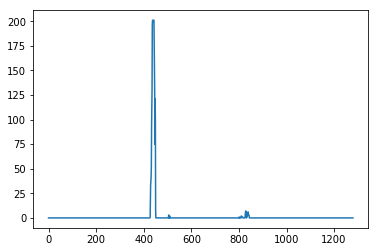

In [22]:
#import numpy as np

#binary_warped = w_img_1
binary_warped = w_test2

# This is a parameter that could be adjusted to account for the noise in the warped image, and to easily identify the start of the lane
#histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
histogram = np.sum(binary_warped[500:,:], axis=0)

plt.plot(histogram)

out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
#print(out_img.shape)

midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

mid_lane = (rightx_base - leftx_base) / 2 + leftx_base
#print(mid_lane, midpoint)
offset = mid_lane-midpoint
print('offset:',offset)

nwindows = 9

window_height = np.int(binary_warped.shape[0]/nwindows)

nonzero = binary_warped.nonzero()
#print('nonzero',nonzero, 'length',len(nonzero))

nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
#print('nonzerox',nonzerox, len(nonzerox))
#print('nonzeroy',nonzeroy, len(nonzeroy))

leftx_current = leftx_base
rightx_current = rightx_base

wmargin = 100

#could be adjusted to configure sensitivity of detecting the new center of the line
minpix = 50

left_lane_inds = []
right_lane_inds = []


for window in range(nwindows):
    
    win_y_low       = binary_warped.shape[0] - (window+1)*window_height
    win_y_high      = binary_warped.shape[0] - (window)*window_height
    
    win_xleft_low   = leftx_current - wmargin
    win_xleft_high  = leftx_current + wmargin
    
    win_xright_low  = rightx_current - wmargin
    win_xright_high = rightx_current + wmargin
    
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2)
    
    good_left_inds  = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

    #print(len(left_lane_inds))
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
        
# Concatenate the arrays of indices
#print('left',left_lane_inds)
left_lane_inds  = np.concatenate((left_lane_inds))
right_lane_inds = np.concatenate((right_lane_inds))

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)


(720, 0)

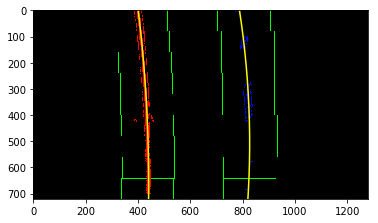

In [23]:
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

# Realized that to cancel noise from unwanted objects/lines, we can filter out parts of image, and shorten the horizon for warping


In [24]:
leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

5445.24198204 3344.39796212


In [25]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
print('offset',offset*xm_per_pix)

2373.50930033 m 846.190816529 m
offset -0.0396428571429


In [26]:
# Import everything needed to edit/save/watch video clips
#from moviepy.editor import VideoFileClip
#from IPython.display import HTML

In [47]:
def prep_img(img):
    
    u_img        = cv2.undistort(img, mtx, dist, None, mtx)
    
    img_sobelx = abs_sobel_thresh(u_img,'x',9,(50,100),'v')

    #S, img_clr = clr_threshold(u_img,(150,255))

    #lanes_img  = np.zeros_like(img_sobelx)
    #lanes_img [((img_sobelx == 1)  | (img_clr == 1))] =1
    
   
   # masked_img = region_of_interest(lanes_img,vertices)
    #ready_img  = warp(masked_img)
    
    ready_img = img_sobelx
    
    return ready_img

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    
    #result = prep_img(image)
    #result = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    result = cv2.undistort(image, mtx, dist, None, mtx)
   
    return cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)

In [52]:
clip1 =[]
output = 'abc2.mp4'
clip1 = VideoFileClip("test_video2.mp4")
clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video abc2.mp4
[MoviePy] Writing video abc2.mp4


100%|█████████▉| 221/222 [00:50<00:00,  4.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: abc2.mp4 

CPU times: user 42.8 s, sys: 595 ms, total: 43.4 s
Wall time: 52.6 s


In [53]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))